In [1]:
log_path = "data/monomers_mutations_with_isolates.log"
path_to_pich_h3 = "data/cutDistOutput6.txt"

save_pick_h3 = eval(eval(open(path_to_pich_h3).readlines()[0]))
#print(save_pick_h3)

pick20_hor = eval(open("output/heatmap_HOR.txt").readlines()[0])
#pick20_h3 = eval(open("output/heatmap_S3CXH1L.3.txt").readlines()[0])
#pick20_h4 = eval(open("output/heatmap_S3CXH1L.4.txt").readlines()[0])
#pick20_h5 = eval(open("output/heatmap_S3CXH1L.5.txt").readlines()[0])
#pick20_h6 = eval(open("output/heatmap_S3CXH1L.6.txt").readlines()[0])
#pick20_h7 = eval(open("output/heatmap_S3CXH1L.7.txt").readlines()[0])
#pick20_h8 = eval(open("output/heatmap_S3CXH1L.8.txt").readlines()[0])
#pick20_h9 = eval(open("output/heatmap_S3CXH1L.9.txt").readlines()[0])
#pick20_h10 = eval(open("output/heatmap_S3CXH1L.10.txt").readlines()[0])
#pick20_h11 = eval(open("output/heatmap_S3CXH1L.11.txt").readlines()[0])
#pick20_h12 = eval(open("output/heatmap_S3CXH1L.12.txt").readlines()[0])

#print(pick20_h2)

#MONOMER_NAME: [(MonomerId, mutations)...]
monomers_list = {}
with open(log_path) as fr:
    for line in fr:
        if "MonomerId" in line:
            monomerName = line.split()[0]
            monomerId = line.split("MonomerId= ")[-1].split()[0]
            mutationList = line.split('[ ')[-1].split(' ]')[0].split(', ')
            if mutationList[0] == '':
                mutationList = []
            
            for i in range(len(mutationList)):
                mutationList[i] = mutationList[i].split('(')[0]
            
            if monomerName not in monomers_list:
                monomers_list[monomerName] = []
            
            monomers_list[monomerName].append((monomerId, mutationList))

## Сделать разбиение мономеров на HORs из файлика, что бы построить 

In [2]:
horInfoPath = "data/cenX_hordecomposition.tsv"
horPos = []
monomers_cnt = 0
cur_line = 0
with open(horInfoPath) as f:
    for line in f:
        cur_line += 1
        if cur_line < 4:
            continue
        parts = line.split('\t')
        if (int(parts[2]) != -1):
            horPos.append((monomers_cnt, monomers_cnt + int(parts[2]) - 1))
            monomers_cnt += int(parts[2])
print(horPos)

[(0, 6), (7, 18), (19, 30), (31, 42), (43, 54), (55, 66), (67, 78), (79, 90), (91, 102), (103, 114), (115, 126), (127, 138), (139, 150), (151, 162), (163, 174), (175, 186), (187, 198), (199, 210), (211, 222), (223, 234), (235, 246), (247, 258), (259, 270), (271, 282), (283, 294), (295, 306), (307, 318), (319, 330), (331, 342), (343, 354), (355, 366), (367, 378), (379, 390), (391, 402), (403, 414), (415, 426), (427, 438), (439, 450), (451, 462), (463, 474), (475, 486), (487, 498), (499, 510), (511, 522), (523, 534), (535, 546), (547, 558), (559, 570), (571, 582), (583, 594), (595, 606), (607, 618), (619, 630), (631, 642), (643, 654), (655, 666), (667, 678), (679, 690), (691, 702), (703, 714), (715, 726), (727, 738), (739, 750), (751, 762), (763, 774), (775, 786), (787, 798), (799, 810), (811, 822), (823, 834), (835, 846), (847, 858), (859, 870), (871, 882), (883, 894), (895, 906), (907, 918), (919, 930), (931, 942), (943, 954), (955, 966), (967, 978), (979, 990), (991, 1002), (1003, 101

In [3]:
MonomerTypeId = [0]*1600*12
for monomerName in monomers_list:
    print(monomerName)
    for i in range(len(monomers_list[monomerName])):
        MonomerTypeId[int(monomers_list[monomerName][i][0])] = (monomerName, i)
print(MonomerTypeId)

S3CXH1L.5
S3CXH1L.3
S3CXH1L.2
S3CXH1L.12
S3CXH1L.10
S3CXH1L.9
S3CXH1L.8
S3CXH1L.7
S3CXH1L.6
S3CXH1L.4
S3CXH1L.1
S3CXH1L.11
[('S3CXH1L.5', 0), ('S3CXH1L.3', 0), ('S3CXH1L.2', 0), ('S3CXH1L.12', 0), ('S3CXH1L.10', 0), ('S3CXH1L.12', 1), ('S3CXH1L.10', 1), ('S3CXH1L.9', 0), ('S3CXH1L.8', 0), ('S3CXH1L.7', 0), ('S3CXH1L.6', 0), ('S3CXH1L.5', 1), ('S3CXH1L.4', 0), ('S3CXH1L.3', 1), ('S3CXH1L.2', 1), ('S3CXH1L.1', 0), ('S3CXH1L.12', 2), ('S3CXH1L.11', 0), ('S3CXH1L.10', 2), ('S3CXH1L.9', 1), ('S3CXH1L.8', 1), ('S3CXH1L.7', 1), ('S3CXH1L.6', 1), ('S3CXH1L.5', 2), ('S3CXH1L.4', 1), ('S3CXH1L.3', 2), ('S3CXH1L.2', 2), ('S3CXH1L.1', 1), ('S3CXH1L.12', 3), ('S3CXH1L.11', 1), ('S3CXH1L.10', 3), ('S3CXH1L.9', 2), ('S3CXH1L.8', 2), ('S3CXH1L.7', 2), ('S3CXH1L.6', 2), ('S3CXH1L.5', 3), ('S3CXH1L.4', 2), ('S3CXH1L.3', 3), ('S3CXH1L.2', 3), ('S3CXH1L.1', 2), ('S3CXH1L.12', 4), ('S3CXH1L.11', 2), ('S3CXH1L.10', 4), ('S3CXH1L.9', 3), ('S3CXH1L.8', 3), ('S3CXH1L.7', 3), ('S3CXH1L.6', 3), ('S3CXH1L.5', 4),

## Построение графа одинаковых мутаций на расстояние Len

На вход получаем Pos, Len и Delta. Строим двудольный граф, в каждой доле Len вершин. G[pos1] = [(pos2, w)]
pos1 + Pos --- реальная позиция HOR(реально не хор, а порядковый номер данного мономера) в геноме. pos2 + Pos + Len реальная позиция мономера. w в данном случае будет равна 1 для всех. Возможные варианты: количество мутаций, близость к Len, доля общих мутаций в мономере. 

In [122]:
def get_mutation_graph(MonomerName, Pos, Len, Delta, MxVertCnt=2000):
    global monomers_list
    G = [[] for i in range(min(MxVertCnt, Len))]
    for i in range(min(Len, MxVertCnt)):
        for j in range(-Delta, Delta + 1):
            real_pos = Pos + i
            real_pos2 = Pos + i + Len + j
            
            if real_pos < 0 or real_pos >= len(monomers_list[MonomerName]):
                continue
                
            if real_pos2 < 0 or real_pos2 >= len(monomers_list[MonomerName]):
                continue
                
            
            if len(set(monomers_list[MonomerName][real_pos][1]) & set(monomers_list[MonomerName][real_pos2][1])) > 0:
                G[i].append((real_pos2 - Pos - Len + Delta, 1))
    return G

In [161]:
def toMonomerId(horId, monomerType):
    global horPos
    global MonomerTypeId
    for i in range(horPos[horId][0], horPos[horId][1] + 1):
        if MonomerTypeId[i] == 0:
            continue
        if MonomerTypeId[i][0] == monomerType:
            return MonomerTypeId[i][1]
    return -1

def HORs_has_same_mut(hor1, hor2):
    for monomerName in monomers_list:
        real_pos = toMonomerId(hor1, monomerName)
        real_pos2 = toMonomerId(hor2, monomerName)
        if real_pos > -1 and real_pos2 > -1:
            if len(set(monomers_list[monomerName][real_pos][1]) & set(monomers_list[monomerName][real_pos2][1])) > 0:
                return 1
    return 0

def get_HOR_mutation_graph(Pos, Len, Delta, MxVertCnt=2000):
    global monomers_list
    global MonomerTypeId
    global horPos
    G = [[] for i in range(min(MxVertCnt, Len))]
    for i in range(min(Len, MxVertCnt)):
        for j in range(-Delta, Delta + 1):
            real_pos = Pos + i
            real_pos2 = Pos + i + Len + j
            
            if real_pos < 0 or real_pos >= len(horPos):
                continue
                
            if real_pos2 < 0 or real_pos2 >= len(horPos):
                continue
                
            if HORs_has_same_mut(real_pos, real_pos2):
                G[i].append((real_pos2 - Pos - Len + Delta, 1))
    return G

## Поиск максимального паросочетания
На вход дан двудольный граф полученный из функции get_mutation_graph. На выходе получаем одно число --- вес максимального паросочетания. 

In [126]:
-

In [135]:
G = get_mutation_graph('S3CXH1L.5', 100, 100, 30, 100)
print(get_max_matching_w(G))

18


In [144]:
def build_pick_matrix(MonomerName, mx_dist, mxVert=2000):
    pick_h = [[0]*mx_dist for i in range(len(monomers_list[MonomerName]))]
    for i in range(len(monomers_list[MonomerName])):
        print(i)
        for Len in range(1, mx_dist):
            delta = min(int(0.2*Len), int(0.2*mxVert))
            pick_h[i][Len] = get_max_matching_w(get_mutation_graph(MonomerName, i, Len, delta, mxVert))
    return pick_h

In [157]:
def build_HOR_pick_matrix(mx_dist, mxVert=2000):
    pick_h = [[0]*mx_dist for i in range(len(horPos))]
    for i in range(len(horPos)):
        print(i)
        for Len in range(1, mx_dist):
            delta = min(int(0.2*Len), int(0.2*mxVert))
            pick_h[i][Len] = get_max_matching_w(get_HOR_mutation_graph(i, Len, delta, mxVert))
    return pick_h

In [145]:
pick_h1_dist10 = build_pick_matrix('S3CXH1L.1', 1505, mxVert=20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [162]:
pick_all_hor = build_HOR_pick_matrix(100, mxVert=20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Строим heatmap

In [34]:
def draw_heatmap(pick):
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt

    tpick = [[0]*(100) for i in range(100)]
    for i in range(1400, 1500):
        for j in range(100):
            tpick[j][i - 1400] = pick[i][j]


    pick5 = np.array(tpick)

    fig, ax = plt.subplots()
    im = ax.imshow(pick5)

    #ax.set_xticks(np.arange(600, 740))
    #ax.set_yticks(np.arange(80))

    fig.tight_layout()
    plt.show()

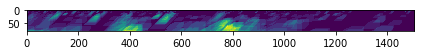

In [71]:
draw_heatmap(pick_h)

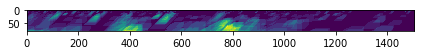

In [72]:
draw_heatmap(pick_h1)

In [ ]:
print(pick_h1)

In [74]:
print(pick_h==pick_h1)

True


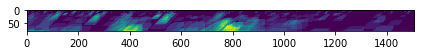

In [76]:
draw_heatmap(pick_h2)

In [77]:
print(pick_h2==pick_h1)

False


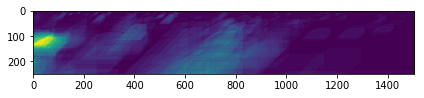

In [82]:
draw_heatmap(pick_h3)

In [80]:
print(pick_h3)

[[0, 1, 0, 0, 0, 0, 1, 2, 3, 3, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5, 7, 8, 8, 8, 8, 9, 10, 10, 10, 10, 9, 11, 12, 14, 16, 18, 20, 22, 22, 22, 22, 23, 24, 25, 26, 27, 27, 28, 30, 31, 31, 33, 33, 34, 34, 35, 34, 36, 36, 36, 37, 37, 36, 35, 35, 35, 36, 38, 39, 39, 41, 43, 45, 47, 49, 49, 49, 49, 48, 45, 43, 43, 42, 40, 37, 37, 37, 35, 34, 33, 32, 32, 31, 30, 29, 27, 28, 28, 26, 26, 27, 27, 25, 25, 25, 25, 25, 23, 22, 21, 20, 21, 21, 23, 22, 21, 21, 20, 21, 20, 18, 18, 17, 17, 17, 17, 19, 19, 20, 22, 21, 22, 22, 23, 23, 24, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 25, 25, 24, 24, 25, 25, 24, 24, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 22, 22, 21, 21, 20, 20, 20, 20, 19, 19], [0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1

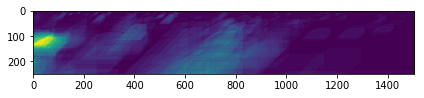

In [7]:
draw_heatmap(save_pick_h3)

In [5]:
print(len(save_pick_h3))
print(len(save_pick_h3[0]))

1505
250


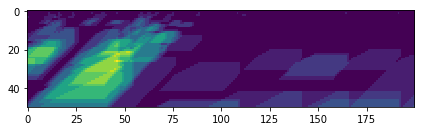

In [71]:
draw_heatmap(save_pick_h3)

In [44]:
for i in range(1000, 1100):
    for j in range(0, 50):
        print(i, j, save_pick_h3[i][j])

1000 0 0
1000 1 0
1000 2 0
1000 3 0
1000 4 1
1000 5 1
1000 6 0
1000 7 0
1000 8 0
1000 9 0
1000 10 0
1000 11 0
1000 12 0
1000 13 1
1000 14 1
1000 15 1
1000 16 1
1000 17 2
1000 18 1
1000 19 1
1000 20 1
1000 21 1
1000 22 1
1000 23 1
1000 24 1
1000 25 1
1000 26 1
1000 27 0
1000 28 0
1000 29 0
1000 30 0
1000 31 0
1000 32 1
1000 33 1
1000 34 1
1000 35 1
1000 36 1
1000 37 1
1000 38 1
1000 39 1
1000 40 1
1000 41 1
1000 42 1
1000 43 1
1000 44 1
1000 45 1
1000 46 1
1000 47 2
1000 48 1
1000 49 3
1001 0 0
1001 1 0
1001 2 0
1001 3 0
1001 4 1
1001 5 1
1001 6 0
1001 7 0
1001 8 0
1001 9 0
1001 10 0
1001 11 0
1001 12 0
1001 13 1
1001 14 1
1001 15 1
1001 16 2
1001 17 2
1001 18 1
1001 19 1
1001 20 1
1001 21 1
1001 22 1
1001 23 1
1001 24 1
1001 25 1
1001 26 1
1001 27 0
1001 28 0
1001 29 0
1001 30 0
1001 31 0
1001 32 1
1001 33 1
1001 34 1
1001 35 1
1001 36 1
1001 37 1
1001 38 1
1001 39 1
1001 40 1
1001 41 1
1001 42 1
1001 43 1
1001 44 1
1001 45 1
1001 46 2
1001 47 2
1001 48 2
1001 49 3
1002 0 0
1002 1 0
10

1027 24 1
1027 25 1
1027 26 0
1027 27 0
1027 28 0
1027 29 0
1027 30 0
1027 31 0
1027 32 1
1027 33 1
1027 34 1
1027 35 1
1027 36 1
1027 37 3
1027 38 3
1027 39 3
1027 40 3
1027 41 3
1027 42 3
1027 43 4
1027 44 4
1027 45 4
1027 46 4
1027 47 5
1027 48 5
1027 49 5
1028 0 0
1028 1 0
1028 2 0
1028 3 0
1028 4 0
1028 5 0
1028 6 0
1028 7 0
1028 8 0
1028 9 0
1028 10 0
1028 11 0
1028 12 0
1028 13 0
1028 14 0
1028 15 0
1028 16 0
1028 17 0
1028 18 0
1028 19 0
1028 20 0
1028 21 1
1028 22 1
1028 23 1
1028 24 1
1028 25 1
1028 26 0
1028 27 0
1028 28 0
1028 29 0
1028 30 0
1028 31 0
1028 32 1
1028 33 1
1028 34 1
1028 35 1
1028 36 1
1028 37 3
1028 38 3
1028 39 3
1028 40 3
1028 41 3
1028 42 3
1028 43 4
1028 44 4
1028 45 4
1028 46 5
1028 47 5
1028 48 5
1028 49 5
1029 0 0
1029 1 0
1029 2 0
1029 3 0
1029 4 0
1029 5 0
1029 6 0
1029 7 0
1029 8 0
1029 9 0
1029 10 0
1029 11 0
1029 12 0
1029 13 0
1029 14 0
1029 15 0
1029 16 0
1029 17 0
1029 18 0
1029 19 0
1029 20 1
1029 21 1
1029 22 1
1029 23 1
1029 24 1
1029 25 1


1056 46 3
1056 47 3
1056 48 3
1056 49 3
1057 0 0
1057 1 0
1057 2 0
1057 3 0
1057 4 0
1057 5 0
1057 6 0
1057 7 0
1057 8 0
1057 9 0
1057 10 0
1057 11 0
1057 12 0
1057 13 0
1057 14 0
1057 15 0
1057 16 0
1057 17 0
1057 18 0
1057 19 0
1057 20 1
1057 21 1
1057 22 1
1057 23 1
1057 24 1
1057 25 1
1057 26 1
1057 27 1
1057 28 1
1057 29 1
1057 30 1
1057 31 0
1057 32 0
1057 33 0
1057 34 0
1057 35 0
1057 36 1
1057 37 2
1057 38 3
1057 39 3
1057 40 3
1057 41 3
1057 42 3
1057 43 3
1057 44 3
1057 45 3
1057 46 3
1057 47 3
1057 48 3
1057 49 3
1058 0 0
1058 1 0
1058 2 0
1058 3 0
1058 4 0
1058 5 0
1058 6 0
1058 7 0
1058 8 0
1058 9 0
1058 10 0
1058 11 0
1058 12 0
1058 13 0
1058 14 0
1058 15 0
1058 16 0
1058 17 0
1058 18 0
1058 19 0
1058 20 1
1058 21 1
1058 22 1
1058 23 1
1058 24 1
1058 25 1
1058 26 1
1058 27 1
1058 28 1
1058 29 1
1058 30 1
1058 31 0
1058 32 0
1058 33 0
1058 34 0
1058 35 0
1058 36 1
1058 37 3
1058 38 3
1058 39 3
1058 40 3
1058 41 3
1058 42 3
1058 43 3
1058 44 3
1058 45 3
1058 46 3
1058 47 3


1085 48 1
1085 49 1
1086 0 0
1086 1 0
1086 2 0
1086 3 0
1086 4 0
1086 5 0
1086 6 1
1086 7 1
1086 8 0
1086 9 0
1086 10 0
1086 11 0
1086 12 0
1086 13 0
1086 14 0
1086 15 0
1086 16 0
1086 17 1
1086 18 1
1086 19 1
1086 20 1
1086 21 1
1086 22 1
1086 23 1
1086 24 1
1086 25 1
1086 26 0
1086 27 1
1086 28 1
1086 29 1
1086 30 1
1086 31 1
1086 32 1
1086 33 2
1086 34 2
1086 35 2
1086 36 2
1086 37 2
1086 38 2
1086 39 2
1086 40 2
1086 41 2
1086 42 2
1086 43 2
1086 44 2
1086 45 2
1086 46 2
1086 47 1
1086 48 1
1086 49 1
1087 0 0
1087 1 0
1087 2 0
1087 3 0
1087 4 0
1087 5 1
1087 6 1
1087 7 1
1087 8 0
1087 9 0
1087 10 0
1087 11 0
1087 12 0
1087 13 0
1087 14 0
1087 15 0
1087 16 0
1087 17 1
1087 18 1
1087 19 1
1087 20 1
1087 21 1
1087 22 1
1087 23 1
1087 24 1
1087 25 1
1087 26 1
1087 27 1
1087 28 1
1087 29 1
1087 30 1
1087 31 1
1087 32 1
1087 33 2
1087 34 2
1087 35 2
1087 36 2
1087 37 2
1087 38 2
1087 39 2
1087 40 2
1087 41 2
1087 42 2
1087 43 2
1087 44 2
1087 45 2
1087 46 2
1087 47 1
1087 48 1
1087 49 1


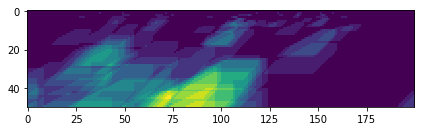

In [118]:
draw_heatmap(pick_h10)

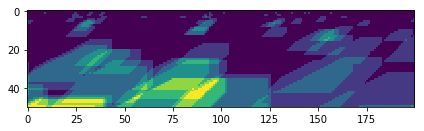

In [119]:
draw_heatmap(save_pick_h3)

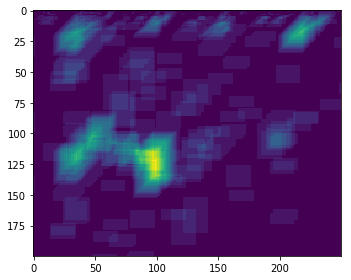

In [195]:
draw_heatmap(pick_h1_dist10) 

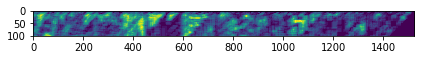

In [165]:
draw_heatmap(pick_all_hor)

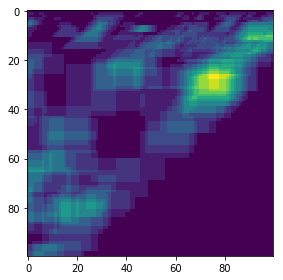

In [35]:
draw_heatmap(pick20_hor)